- python处理Excel的意义
    - Excel是Windows环境下流行的、强大的电子表格应用。无论是在工作中还是学习中我们都几乎在不间断的使用Excel来记录或者处理一些数据。例如，可能有一个无聊的任务，需要从一个电子表格拷贝一些数据，粘贴到另一个电子表格中。或者可能需要从几千行中挑选几行，根据某种条件稍作修改。或者需要查看几百份部门预算电子表格，寻找其中的赤字。正是这种无聊无脑的电子表格任务，如果让人工来手动完成，则无论是时间升本还是精力成本都不是一件好事情，但是可以通过 Python 来完成。

- python处理Excel的方式
    - openpyxl

- 环境安装：
    - 模块官网：https://pypi.org/project/openpyxl/
    - 最新版本：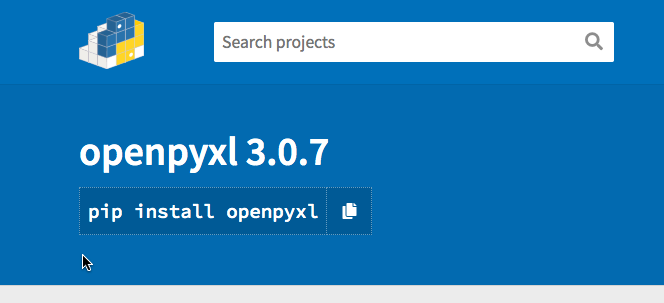
    - pip install -U openpyxl==3.0.7 /  pip install openpyxl==3.0.7
    - 三方支持：
        - pip install lxml
        - pip install pillow

- 首先，让我们来看一些基本定义：
    - 工作簿：一个 Excel 电子表格文档称为一个工作簿，一个 工作簿保存在扩展名为.xlsx 的文件中
    - sheet表：每个工作簿可以包含多个表(也称为工作表)
    - 活动表：用户当前查看的表(或关闭 Excel 前最后查看的表)，称为活动表
    - 单元格：每个表都有一些列(地址是从 A 开始的字母)和一些行(地址是从 1 开始的数 字)。在特定行和列的方格称为单元格。每个单元格都包含一个数字或文本值。


### 读取Excel表格

In [1]:
import openpyxl

- 用 openpyxl 模块打开 Excel 文档

In [2]:
#创建了一个指定的工作簿对象
wb = openpyxl.load_workbook(filename='./data/test.xlsx')

/Users/bobo/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


- 获取工作簿的sheet表的名称

In [5]:
wb.get_sheet_names()

['Sheet']

- 获取指定的sheet对象

In [6]:
sheet = wb.get_sheet_by_name('基本信息')
sheet

/Users/bobo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  """Entry point for launching an IPython kernel.


KeyError: 'Worksheet 基本信息 does not exist.'

- 获取活动表

In [5]:
wb.get_active_sheet()

<Worksheet "职位信息">

- 从表中取得单元格
    - 有了 Worksheet 对象后，就可以按名字访问 Cell 对象
        - 属性：
            - value:cell中存储的值
            - row：行索引
            - column：列索引
            - coordinate：坐标

In [39]:
cell = sheet['A2']
cell.value
cell.row
cell.column
cell.coordinate

'A2'

用字母来指定列，这在程序中可能有点奇怪，特别是在 Z 列之后，列开时使用 两个字母:AA、AB、AC 等。作为替代，在调用表的 cell()方法时，可以传入整数 作为 row 和 column 关键字参数，也可以得到一个单元格。第一行或第一列的整数 是 1，不是 0。

In [41]:
sheet.cell(row=1,column=2).value

'age'

- 从工作表中取得行和列
    - 可以将 Worksheet 对象进行切片操作，从而取得电子表格中一行、一列或一个矩形区域中的所有 Cell 对象。

In [45]:
for cell_row in sheet['A2':'E6']:
    for cell in cell_row:
        print(cell.coordinate,cell.value)

A2 bobo
B2 20
C2 10000
D2 BJ
E2 No
A3 bobo1
B3 20
C3 10000
D3 SH
E3 No
A4 bobo2
B4 20
C4 10000
D4 BJ
E4 YS
A5 bobo3
B5 20
C5 10000
D5 GZ
E5 No
A6 bobo4
B6 20
C6 10000
D6 BJ
E6 No


- 要访问特定行或列的单元格的值，也可以利用 Worksheet 对象的 rows 和 columns属性。

In [51]:
sheet.columns[0]

(<Cell 基本信息.A1>,
 <Cell 基本信息.A2>,
 <Cell 基本信息.A3>,
 <Cell 基本信息.A4>,
 <Cell 基本信息.A5>,
 <Cell 基本信息.A6>,
 <Cell 基本信息.A7>)

### 项目：2010 年美国人口普查数据自动化处理
- 在这个项目中，你要编写一个脚本，从人口普查电子表格文件中读取数据，并在几秒钟内计算出每个县的统计值（可以根据县的名称快速计算出县的总人口和普查区的数量）。
    - 下面是程序要做的事:
        - 从 Excel 电子表格中读取数据。 
        - 计算每个县中普查区的数目。 
        - 计算每个县的总人口。 打印结果。
    - 这意味着代码需要完成下列任务:
        - 用 openpyxl 模块打开 Excel 文档并读取单元格。 
        - 计算所有普查区和人口数据，将它保存到一个数据结构中。
        - 利用 pprint 模块，将该数据结构写入一个扩展名为.py 的文本文件。

- 数据说明：
    - censuspopdata.xlsx 电子表格中只有一张表，名为'Population by Census Tract'。
    - 每一行都保存了一个普查区的数据。
    - 列分别是普查区的编号(A)，州的简称(B)，县的名称(C)，普查区的人口(D)。
        - 注意：一个县会设定多个普查区，D列表示县中所有普查区对应每一个普查区的人口数量

- print()和pprint()都是python的打印模块，功能基本一样，唯一的区别就是pprint()模块打印出来的数据结构更加完整，每行为一个数据结构，更加方便阅读打印输出结果。特别是对于特别长的数据打印，print()输出结果都在一行，不方便查看，而pprint()采用分行打印输出，所以对于数据结构比较复杂、数据长度较长的数据，适合采用pprint()打印方式。当然，一般情况多数采用print()。

countyData结构：
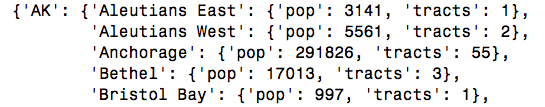

如果前面的字典保存在 countyData 中，下面的表达式求值结果如下：
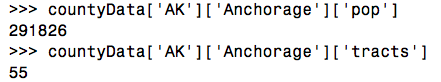

In [52]:
import openpyxl, pprint
print('Opening workbook...')
wb = openpyxl.load_workbook('data/censuspopdata.xlsx')
sheet = wb.get_sheet_by_name('Population by Census Tract')
#countyData将包含你计算的每个县的总人口和普查区数目。但在它里面存储任何东西之前，你应该确定它内部的数据结构。
countyData = {}
print('Reading rows...')
for row in range(2, sheet.get_highest_row() + 1):
    state = sheet['B' + str(row)].value
    county = sheet['C' + str(row)].value 
    pop = sheet['D' + str(row)].value
    countyData.setdefault(state, {})  #{state:{}}
    countyData[state].setdefault(county, {'tracts': 0, 'pop': 0}) #{state:{county:{'tracts': 0, 'pop': 0}}}
    countyData[state][county]['tracts'] += 1
    countyData[state][county]['pop'] += int(pop)
print('Writing results...')
resultFile = open('census2010.py', 'w')
#使用 pprint.pformat()函数，将变量字典的值作为一个巨大的字符串， 写入文件 census2010.py
resultFile.write('allData = ' + pprint.pformat(countyData)) 
resultFile.close()
print('Done.')

Opening workbook...
Reading rows...
Writing results...
Done.


将countyData输出到文本文件 census2010.py，你就通过 Python 程序生成了一个 Python 程序!这样做的好处是现在可以导入 census2010.py，就像任何其他 Python 模块一样

In [53]:
import os
import census2010
#查看AK州Anchorage县的人口普查数据
census2010.allData['AK']['Anchorage']

{'pop': 291826, 'tracts': 55}

In [54]:
anchoragePop = census2010.allData['AK']['Anchorage']['pop']
print('The 2010 population of Anchorage was ' + str(anchoragePop))

The 2010 population of Anchorage was 291826


### 写入Excel文档
- OpenPyXL 也提供了一些方法写入数据，这意味着你的程序可以创建和编辑电子表格文件。利用Python创建一个包含几千行数据的电子表格是非常简单的。


- 调用 openpyxl.Workbook()函数，创建一个新的空 Workbook 对象

In [74]:
import openpyxl

In [3]:
#创建一个新的工作簿对象
wb = openpyxl.Workbook()

- 获取工作表名称

In [77]:
wb.get_sheet_names()

['Sheet']

- 给工作表设置名称

In [78]:
sheet = wb.get_active_sheet()
sheet.title = '跟进记录表'

In [79]:
wb.get_sheet_names()

['跟进记录表']

- 保存工作表

In [80]:
wb.save('./data/第一个工作簿.xlsx')

- 创建和删除工作表
    - 利用 create_sheet() and remove_sheet()方法，可以在工作簿中添加或删除工作表
        - create_sheet()方法返回一个新的 Worksheet 对象，名为 SheetX，它默认是工作 簿的最后一个工作表。可以利用 index 和 title 关键字参数，指定新工作表的 索引或名称。
        - remove_sheet()方法接受一个 Worksheet 对象作为其参数，而不是工作表名称的字符串。如果你只知道要删除的工作表的名称，就调用 get_sheet_by_name()，将它的返回值传入 remove_sheet()。
        - 在工作簿中添加或删除工作表之后，记得调用 save()方法来保存变更。

- 创建sheet

In [81]:
wb = openpyxl.Workbook()

In [82]:
wb.create_sheet(title='销售记录')
wb.create_sheet(index=1,title='养殖技术')

<Worksheet "养殖技术">

In [83]:
wb.get_sheet_names()

['Sheet', '养殖技术', '销售记录']

- 删除sheet

In [84]:
r_sheet = wb.get_sheet_by_name('养殖技术')
wb.remove_sheet(r_sheet)

In [85]:
wb.get_sheet_names()

['Sheet', '销售记录']

- 将值写入单元格
    - 将值写入单元格，很像将值写入字典中的键
    - 如果你有单元格坐标的字符串，可以像字典的键一样，将它用于 Worksheet 对 象，指定要写入的单元格。

In [86]:
sheet = wb.get_active_sheet()
sheet['A1'] = 'hello'
sheet['B2'] = 'world'
wb.save('./data/第二个工作簿.xlsx')

### 项目:更新一个电子表格
- 这个项目需要编写一个程序，更新产品销售电子表格中的单元格。程序将遍 历这个电子表格，找到特定类型的产品，并更新它们的价格

- 数据说明：
    - 每一行代表一次单独的销售。列分别是销售产品的类型(A)、产品每磅的价格(B)、销售的磅数(C)，以及这次销售的总收入（D）。TOTAL列已经设置为 Excel公式，将每磅的成本乘以销售的磅数，并将结果取整到分。有了这个公式，如果列 B 或 C 发 生变化，TOTAL 列中的单元格将自动更新。


- 现在假设 Garlic、Celery 和 Lemons 的价格输入的不正确。这让你面对一项无聊 的任务:遍历这个电子表格中的几万行，更新所有 garlic、celery 和 lemon 行中每磅 的价格。你不能简单地对价格查找替换，因为可能有其他的产品价格一样，你不希 望错误地“更正”。对于几万行数据，手工操作可能要几小时。但你可以编写程序， 几秒钟内完成这个任务。
- 你的程序做下面的事情:
    - 循环遍历所有行。
    - 如果该行是 Garlic、Celery 或 Lemons，更新价格。
- 这意味着代码需要做下面的事情:
    - 打开电子表格文件。
    - 针对每一行，检查列 A 的值是不是 Celery、Garlic 或 Lemon。 如果是，更新列 B 中的价格。 将该电子表格保存为一个新文件(这样就不会丢失原来的电子表格，以防万一)。
    


- 需要更新的价格如下:
    - Celery 1.19
    - Garlic 3.07
    - Lemon 1.27

- 利用更新信息建立数据结构
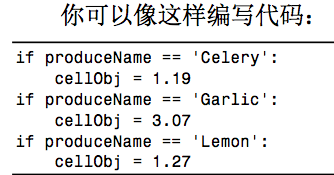
    - 这样硬编码产品和更新的价格有点不优雅。如果你需要用不同的价格，或针对不同的产品，再次更新这个电子表格，就必须修改很多代码。每次修改代码，都有引入缺陷的风险。
    - 更灵活的解决方案，是将正确的价格信息保存在字典中，在编写代码时，利用这个数据结构,如果需要再次更新这个电子表格，只需要更新 PRICE_UPDATES字典，不用修改其他代码。

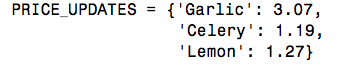

In [87]:
import openpyxl
wb = openpyxl.load_workbook('./data/produceSales.xlsx')
sheet = wb.get_sheet_by_name('Sheet')
PRICE_UPDATES = {'Garlic': 3.07,
                 'Celery': 1.19,
                 'Lemon': 1.27}
for rowNum in range(2, sheet.get_highest_row()+1): 
    produceName = sheet.cell(row=rowNum, column=1).value
    if produceName in PRICE_UPDATES:
        sheet.cell(row=rowNum, column=2).value = PRICE_UPDATES[produceName]
wb.save('./data/updatedProduceSales.xlsx')

### 设置单元格的字体风格
- 设置某些单元格行或列的字体风格，可以帮助你强调电子表格中重点的区域。 例如，在这个产品电子表格中，程序可以对 产品的名称 等行使用粗体。 或者也许你希望对每公斤价格超过5元的行使用斜体。手工为大型电子表格的某些部分设置字体风格非常令人厌烦，但程序可以马上完成。
- 为了定义单元格的字体风格，需要从 openpyxl.styles 模块导入 Font和 Style。
- Font参数：
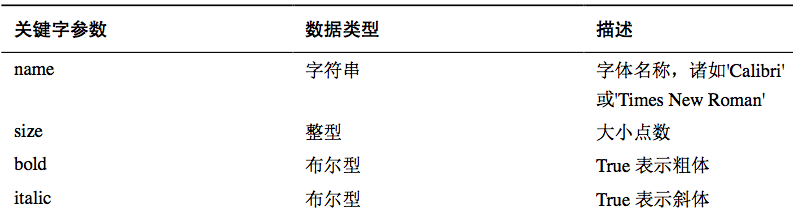

In [1]:
from openpyxl.styles import Font,Style
import openpyxl
wb = openpyxl.Workbook()
sheet = wb.get_active_sheet()
sheet['A3'] = 'hello bobo'
wb.save('./data/Styles.xlsx')

In [2]:
sheet['A3'].style #返回当前单元格的默认风格

Style(number_format='General')

可以调用 Font()来创建一个 Font 对象，并将这个 Font 对象保存在一个变量中。 然后将它传递给 Style()，得到 的 Style 对象保存在一个变量中，并将该变量赋给 Cell 对象的 style 属性。

In [14]:
f = Font(sz=50,b=True,i=True)
s = Style(font=f)
sheet['A3'].style = s
wb.save('./data/Styles.xlsx')

### 公式
- 利用 openpyxl 模块，用编程的方式在单元格中添加公式，就像 添加普通的值一样。例如:
    - sheet['B9'] = '=SUM(B1:B8)'

In [27]:
import openpyxl
wb = openpyxl.Workbook()
sheet = wb.get_active_sheet()
sheet['A1'] = 200
sheet['A2'] = 300
sheet['A3'] = '=SUM(A1:A2)'
wb.save('./data/sum.xlsx')

### 调整行和列
- 在 Excel 中，调整行和列的大小非常容易，只要点击并拖动行的边缘，或列的 头部。但如果你需要根据单元格的内容来设置行或列的大小，或者希望设置大量电子表格文件中的行列大小，编写 Python 程序来做就要快得多。


- 设置行高和列宽
    - Worksheet 对象有 row_dimensions 和 column_dimensions 属性，控制行高和列宽。

In [55]:
import openpyxl
wb = openpyxl.Workbook()
sheet = wb.get_active_sheet()
sheet['A1'] = 'Tall row'
sheet['B2'] = 'Wide column'
wb.save('./data/dimensions.xlsx')

In [56]:
sheet.row_dimensions

{1: <openpyxl.worksheet.dimensions.RowDimension at 0x108af1f98>,
 2: <openpyxl.worksheet.dimensions.RowDimension at 0x108af1dd8>}

In [57]:
sheet.column_dimensions

DimensionHolder([('A',
                  <openpyxl.worksheet.dimensions.ColumnDimension at 0x108af1c88>),
                 ('B',
                  <openpyxl.worksheet.dimensions.ColumnDimension at 0x108af1978>)])

In [58]:
#设置行高
sheet.row_dimensions[2].height = 50

In [59]:
#设置列宽
sheet.column_dimensions['A'].width = 80

In [60]:
wb.save('./data/dimensions.xlsx')

- 注意：
    - 行的高度可以设置为 0 到 409 之间的整数或浮点值。这个值表示高度的点数。
        - 一点等于 1/72 英寸。默认的行高是 12.75。
    - 列宽可以设置为 0 到 255 之间的整数或浮点数。
        - 默认的列宽是 8.43 个字符。列宽为零或行高为零，将使单元格隐藏。


### 合并和拆分单元格
- 利用 merge_cells()工作表方法，可以将一个矩形区域中的单元格合并为一个单元格。
- 要拆分单元格，就调用 unmerge_cells()工作表方法。

In [63]:
import openpyxl
wb = openpyxl.Workbook()
sheet = wb.get_active_sheet()
sheet.merge_cells('A1:D7') #合并
sheet['A1'] = 'hello bobo'
wb.save('./data/merged.xlsx')

In [64]:
sheet.unmerge_cells('A1:D7')

In [67]:
sheet['A2'].value

### 冻结窗格
- 对于太大而不能一屏显示的电子表格，“冻结”顶部的几行或最左边的几列，是很有帮助的。在 OpenPyXL 中，每个 Worksheet 对象都有一个 freeze_panes 属性，可以设置为一个 Cell 对象或一个单元格坐标的字符串。
    - 请注意，单元格上边的所有行和左边的所有列都会冻结，但单元格所在的行和列不会冻结。
- 要解冻所有的单元格，就将 freeze_panes 设置为 None 或'A1'
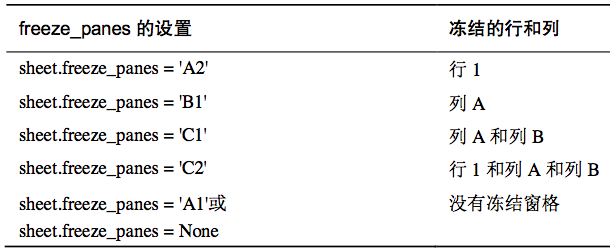

In [68]:
#冻结
import openpyxl
wb = openpyxl.load_workbook('./data/produceSales.xlsx')
sheet = wb.get_active_sheet()
sheet.freeze_panes = 'A2'
wb.save('./data/produceSales.xlsx')

In [69]:
#解冻结
sheet.freeze_panes = None
wb.save('./data/produceSales.xlsx')

### 绘制图表

- openpyxl 支持利用工作表中单元格的数据，创建条形图、折线图、散点图和饼图。要创建图表，需要做下列事情：
    - 1．从一个矩形区域选择的单元格，创建一个 Reference 对象。
    - 2．通过传入 Reference 对象，创建一个 Series 对象。
    - 3．创建一个 Chart 对象。
    - 4．将 Series 对象添加到 Chart 对象。
    - 5．可选地设置Chart 对象的drawing.top、drawing.left、drawing.width 和drawing.height变量用来设置图表的位置和大小。
    - 6．将 Chart 对象添加到 Worksheet 对象。

- Reference 对象需要一些解释。Reference 对象表示图表要引用的数据区域。是通过调用 openpyxl.charts.Reference()函数并传入 3 个参数创建的：
    - 1．包含图表数据的 Worksheet 对象。
    - 2．两个整数的元组，代表矩形选择区域的左上角单元格，该区域包含图表数据：元组中第一个整数是行，第二个整数是列。请注意第一行是 1，不是 0。
    - 3．两个整数的元组，代表矩形选择区域的右下角单元格，该区域包含图表数据：元组中第一个整数是行，第二个整数是列。

In [11]:
import openpyxl
wb = openpyxl.load_workbook(filename='./data/sampleChart.xlsx')
sheet = wb.get_active_sheet()

    
refObj = openpyxl.charts.Reference(sheet, (1, 2),(10,2))
seriesObj = openpyxl.charts.Series(refObj, title='First series')
chartObj = openpyxl.charts.BarChart()
chartObj.append(seriesObj)
chartObj.drawing.top = 200 # set the position
chartObj.drawing.left = 200
chartObj.drawing.width = 300 # set the size
chartObj.drawing.height = 200
sheet.add_chart(chartObj)
wb.save('./data/sampleChart.xlsx')

- 我们可以调用 openpyxl.charts.BarChart()，创建一个条形图。也可以调用openpyxl.charts.LineChart()、openpyxl.charts.ScatterChart()和 openpyxl.charts.PieChart()，创建折线图、散点图和饼图。

In [35]:
import openpyxl
from openpyxl.charts import Reference,BarChart,Series
import os
for file_name in os.listdir('./data/Bobo公司2020-2030年营收报表'):
    if file_name != '.DS_Store':
        file_name = os.path.join('./data/Bobo公司2020-2030年营收报表',file_name)
        ex_file = openpyxl.load_workbook(file_name)
        sheet_names = ex_file.get_sheet_names()
        for sheet_name in sheet_names:
            sheet_file = ex_file.get_sheet_by_name(sheet_name)
            
            data1 = Reference(sheet_file, (2, 2),(32,2))
            data2 = Reference(sheet_file, (2, 3),(32,3))
            data3 = Reference(sheet_file, (2, 4),(32,4))
            seriesObj1 = Series(data1,title='手机')
            seriesObj2 = Series(data2,title='彩妆')
            seriesObj3 = Series(data3,title='电脑')
            
            bc = BarChart()
            bc.title = sheet_name
            bc.x_axis.title = '日期'
            bc.y_axis.title = '营收额'
            bc.append(seriesObj1)
            bc.append(seriesObj2)
            bc.append(seriesObj3)
            
            bc.drawing.top = 200 # set the position
            bc.drawing.left = 400
            bc.drawing.width = 600 # set the size
            bc.drawing.height = 400
            sheet_file.add_chart(bc)
    ex_file.save(file_name)           


### 练习题


1.openpyxl.load_workbook()函数返回什么?

2.get_sheet_names()工作簿方法返回什么? 

3.如何取得名为'Sheet1'的工作表的 Worksheet 对象? 

4.如何取得工作簿的活动工作表的 Worksheet 对象? 

5.如何取得单元格 C5 中的值?

6.如何将单元格 C5 中的值设置为"Hello"? 

7.工作表方法 get_highest_column()和 get_highest_row()返回什么?

8.如何取得从 A1 到 F1 的所有 Cell 对象的元组? 

9.如何将工作簿保存到文件名 example.xlsx? 

10.如何在一个单元格中设置公式? 

11.如果需要取得单元格中公式的结果，而不是公式本身，必须先做什么? 

12.如何将第 5 行的高度设置为 100?

13.如何设置列 C 的宽度?

14.什么是冻结窗格?


### 实践项目

- 创建一个9*9乘法表

- 编写一个程序，翻转电子表格中行和列的单元格。例如，第 5 行第 3 列的值将 出现在第 3 行第 5 列(反之亦然)。这应该针对电子表格中所有单元格进行